In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import pandas as pd

%matplotlib inline 

In [2]:
df_mdrw = pd.read_csv('..\output\data\sat50_temporal_MDRW_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_mdrw

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.96,2.916667,0.275919,0.060176,1,308,0.727833
1,12,0.96,2.989583,0.297316,0.058354,2,308,0.724500
2,24,0.84,2.714286,0.319282,0.048392,1,250,0.655833
3,36,0.84,4.976190,0.354895,0.042554,1,260,0.634167
4,48,0.84,5.785714,0.378437,0.032002,1,278,0.609167
...,...,...,...,...,...,...,...,...
4495,1740,0.96,2.552083,0.390285,0.051537,2,334,0.701000
4496,1752,0.96,2.270833,0.335491,0.055690,2,310,0.721667
4497,1764,0.96,2.416667,0.351116,0.053877,2,322,0.707000
4498,1776,0.96,3.072917,0.300261,0.058343,1,316,0.722000


In [4]:
df_rnd = pd.read_csv('..\output\data\sat50_temporal_RND_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_rnd

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.960000,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
1,12,0.960000,6.087585,0.552809,5.248087e-18,5,5034,0.553211
2,24,0.845714,5.669884,0.560839,-1.365395e-18,2,4080,0.513741
3,36,0.845714,6.782819,0.572776,-2.344787e-17,4,4108,0.508367
4,48,0.845714,6.779923,0.545780,-1.995802e-18,4,4178,0.504816
...,...,...,...,...,...,...,...,...
4495,1740,0.954545,6.428571,0.533960,-2.220399e-02,8,474,0.537424
4496,1752,0.954545,6.904762,0.544147,-3.070778e-02,7,460,0.538939
4497,1764,0.954545,6.876190,0.520496,-3.149598e-02,6,466,0.533182
4498,1776,0.954545,5.152381,0.467200,-2.866593e-02,6,440,0.553636


In [3]:
mdrw = df_mdrw.groupby('Timestamp').mean()
mdrw

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,3.209375,0.319476,0.054844,1.833333,324.933333,0.711194
12,0.960000,3.661806,0.348885,0.051284,1.866667,329.866667,0.701000
24,0.851333,3.374864,0.368065,0.042512,0.333333,267.533333,0.644833
36,0.851333,4.124077,0.403961,0.039537,0.600000,274.800000,0.628583
48,0.851333,4.148513,0.378650,0.035382,0.933333,281.933333,0.619567
...,...,...,...,...,...,...,...
1740,0.960000,4.639583,0.397671,0.031750,2.866667,346.533333,0.667094
1752,0.960000,3.612847,0.365941,0.036443,2.400000,328.733333,0.686656
1764,0.960000,3.378819,0.353863,0.042016,2.033333,333.800000,0.686717


In [5]:
rnd = df_rnd.groupby('Timestamp').mean()
rnd

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.961264,5.572910,0.532422,-0.022552,6.000000,654.266667,0.553696
12,0.961264,6.065283,0.559530,-0.023063,5.833333,657.466667,0.550831
24,0.845562,5.621409,0.568130,-0.022025,2.600000,529.466667,0.512934
36,0.845562,6.168398,0.569275,-0.021161,3.800000,530.600000,0.509139
48,0.845562,6.504424,0.545121,-0.022143,4.400000,541.466667,0.503472
...,...,...,...,...,...,...,...
1740,0.961264,7.176952,0.532545,-0.020666,6.633333,675.533333,0.544854
1752,0.961264,6.306106,0.514566,-0.022227,5.766667,648.533333,0.554434
1764,0.961264,5.733108,0.514126,-0.023798,5.566667,661.933333,0.545869


(0.0, 1.0)

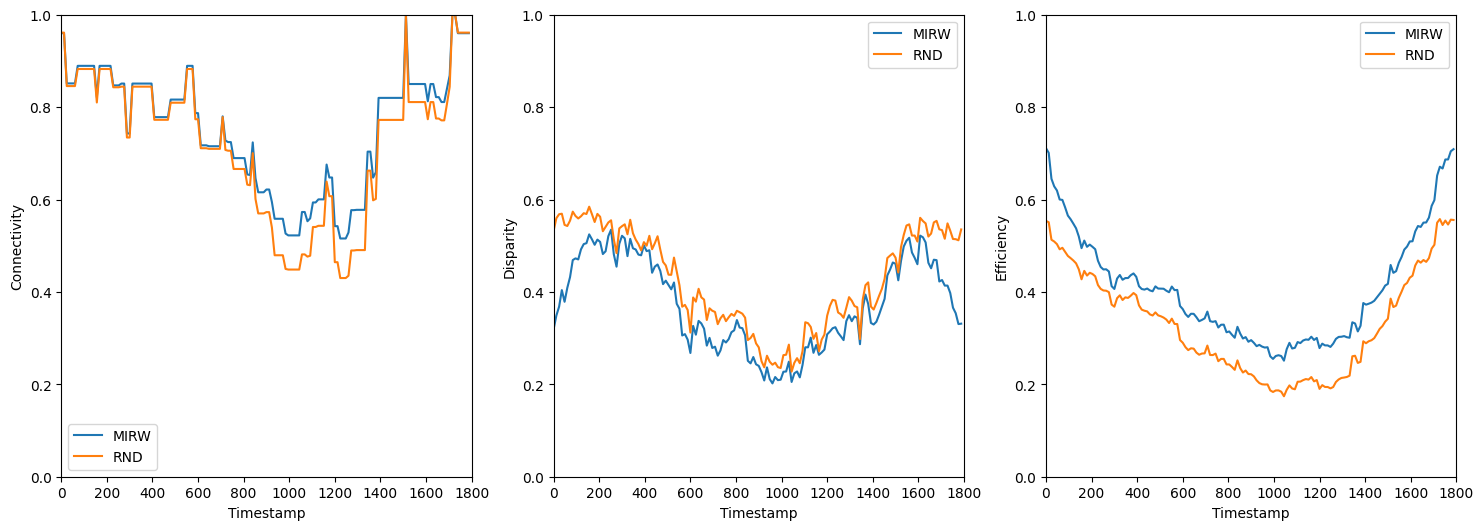

In [15]:
fig, axes = plt.subplots(figsize=(18,6), ncols=3)
idx = list(rnd.index)

ax = axes[0]
ax.plot(idx, mdrw['Connectivity'], label='MIRW')
ax.plot(idx, rnd['Connectivity'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Connectivity')
ax.set_xlim(0,1800)
ax.set_ylim(0,1)

ax = axes[1]
ax.plot(idx, mdrw['Disparity_avg'], label='MIRW')
ax.plot(idx, rnd['Disparity_avg'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Disparity')
ax.set_xlim(0,1800)
ax.set_ylim(0,1)

ax = axes[2]
ax.plot(idx, mdrw['Efficiency'], label='MIRW')
ax.plot(idx, rnd['Efficiency'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Efficiency')
ax.set_xlim(0,1800)
ax.set_ylim(0,1)

Text(0, 0.5, 'Modularity')

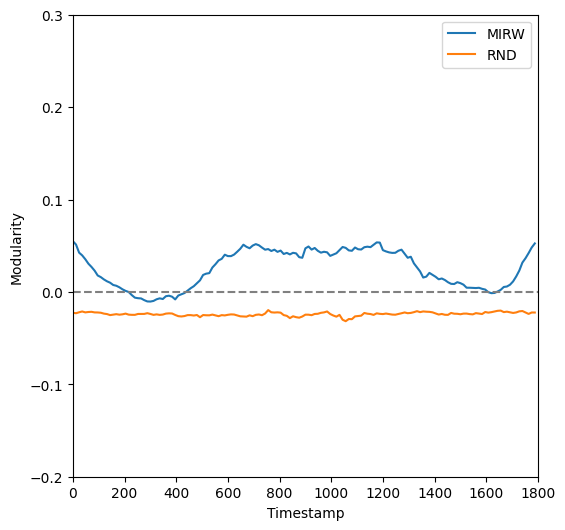

In [17]:
plt.figure(figsize=(6,6))
plt.plot(mdrw['Modularity'], label='MIRW')
plt.plot(rnd['Modularity'], label='RND')
plt.hlines(0,0,1800, ls='--', color='gray')
plt.xlim(0,1800)
plt.ylim(-0.2,0.3)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Modularity')

Text(0, 0.5, 'Redundancy')

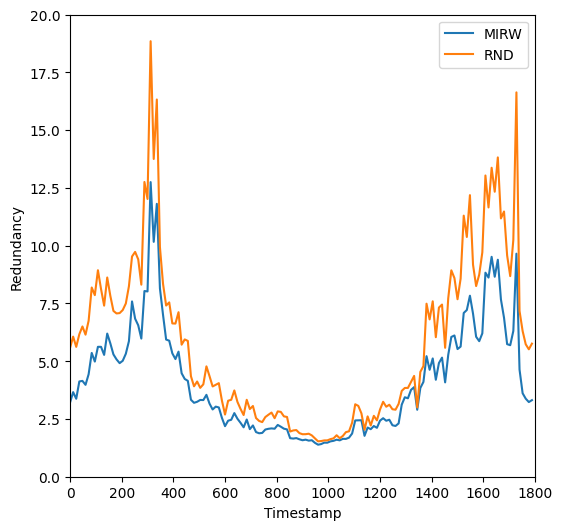

In [19]:
plt.figure(figsize=(6,6))
plt.plot(mdrw['Redundancy_avg'], label='MIRW')
plt.plot(rnd['Redundancy_avg'], label='RND')
plt.xlim(0,1800)
plt.ylim(0,20)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Redundancy')

Text(0, 0.5, 'Routing cost')

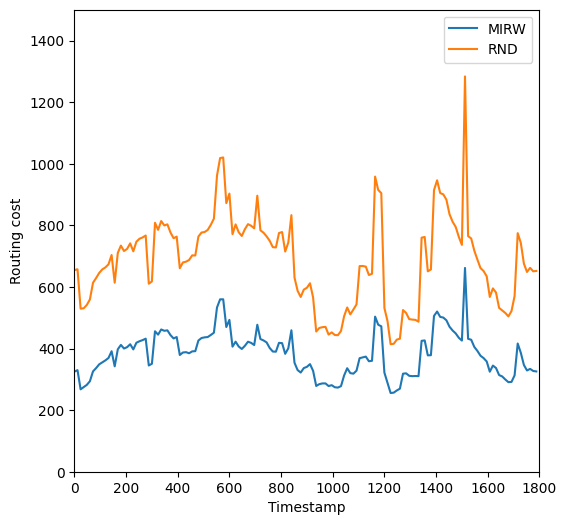

In [22]:
plt.figure(figsize=(6,6))
plt.plot(mdrw['RCost'], label='MIRW')
plt.plot(rnd['RCost'], label='RND')
plt.xlim(0,1800)
plt.ylim(0,1500)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Routing cost')

Text(0, 0.5, '# Critical nodes')

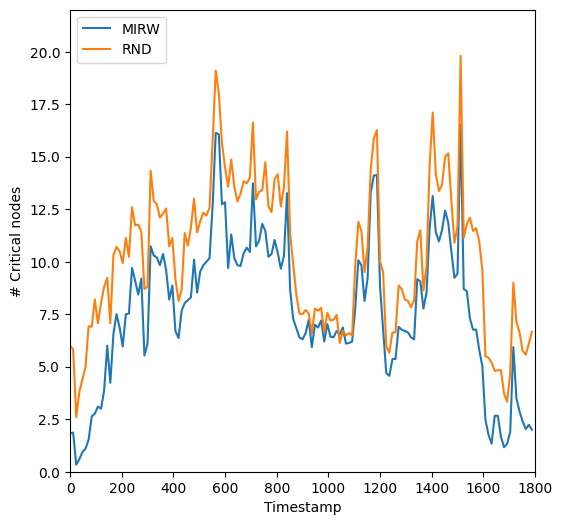

In [24]:
plt.figure(figsize=(6,6))
plt.plot(mdrw['Criticity'], label='MIRW')
plt.plot(rnd['Criticity'], label='RND')
plt.xlim(0,1800)
plt.ylim(0,22)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('# Critical nodes')

In [26]:
variables = ['Redundancy_avg', 'Connectivity', 'Disparity_avg', 'Modularity', 'Criticity', 'RCost', 'Efficiency']

In [37]:
# Correlated variables in MIRW:
# Redundancy: [Disparity, Modularity]
# Connectivity: [RCost, Efficiency]
# Disparity: [Redundancy, Modularity, RCost]
# Modularity: [Disparity, Redundancy]
# Criticity: [RCost]
# RCost: [Connectivity, Disparity, Criticity]
# Efficiency: [Connectivity]

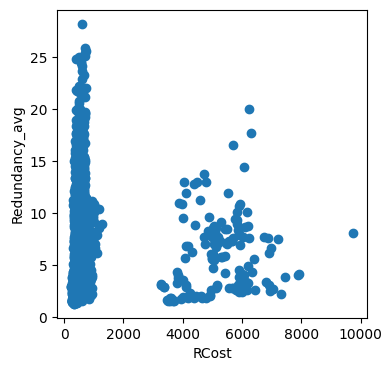

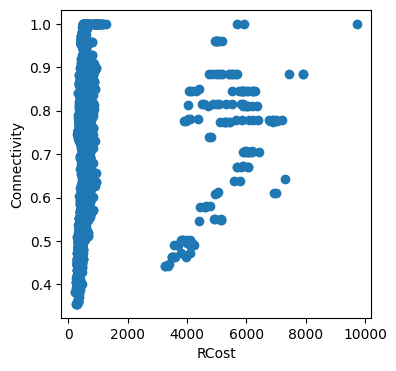

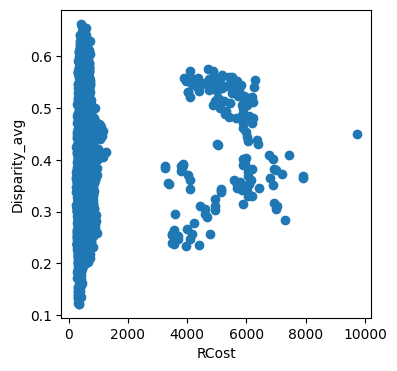

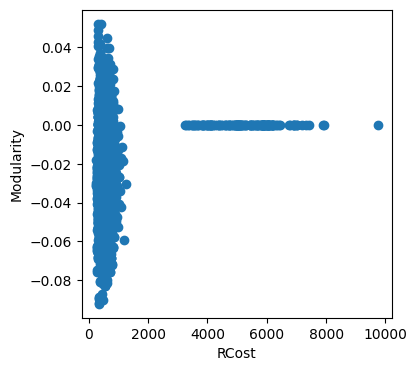

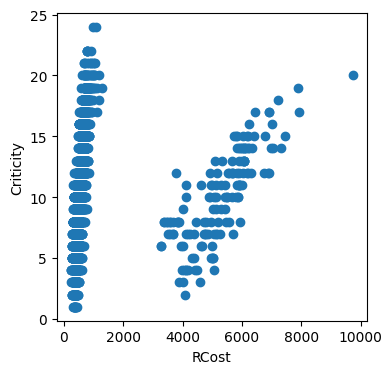

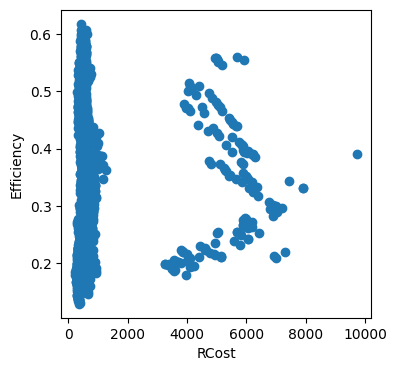

In [30]:
metric = 'RCost'
for var in variables:
    if var != metric:
        plt.figure(figsize=(4,4))
        plt.scatter(df_rnd[metric], df_rnd[var])
        plt.xlabel(metric)
        plt.ylabel(var)